m2dsupsdlclass/lectures-labs  
https://github.com/m2dsupsdlclass/lectures-labs/blob/master/labs/02_backprop/Backpropagation_numpy.ipynb  
implementING a real gradient descent in Numpy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

------------------------------


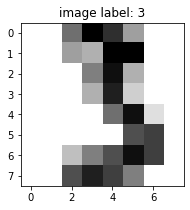

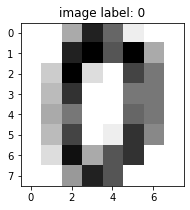

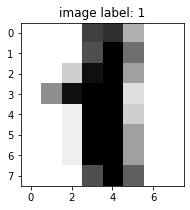

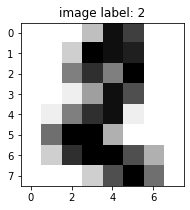

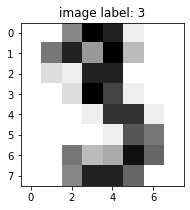

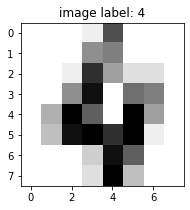

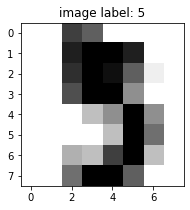

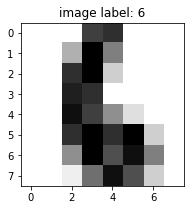

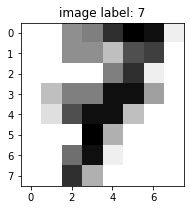

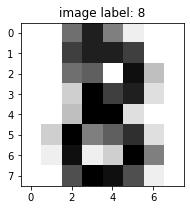

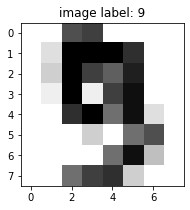

In [32]:
sample_index = 45

plt.figure(figsize=(3, 3))

plt.imshow(digits.images[sample_index],
    cmap=plt.cm.gray_r,
    interpolation='nearest')





# digits.target - labels for each of the examples in the dataset
plt.title("image label: %d" % digits.target[sample_index]);

print("------------------------------")
for i in range(0,10):
    plt.figure(figsize=(3, 3))
    plt.title("image label: %d" % digits.target[i]);
    plt.imshow(digits.images[i],
        cmap=plt.cm.gray_r,
        interpolation='nearest')

In [34]:
from sklearn.model_selection import train_test_split

# cast digits.data/digits.target ndarray from float64/int64 to float32/int32
data   = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

print(digits.data)
print(digits.data.dtype)
print(digits.target.dtype)
print("-----------------------------------------------------")
print(data)
print(data.dtype)
print(target.dtype)


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)


print("--------------------------------------")
print(X_train.shape)
print(X_train.dtype)

print(X_test.shape)

print(y_train.shape)
print(y_train.dtype)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
float64
int64
-----------------------------------------------------
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
float32
int32
--------------------------------------
(1527, 64)
float32
(270, 64)
(1527,)
int32


In [40]:

# np.eye() - https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html
#            Return a 2-D array with ones on the diagonal and zeros elsewhere.
#            numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
#            N - Number of rows in the output.
#            k - Index of the diagonal: 0 (the default) refers to the main diagonal
print(np.eye(10, k=0))
print("=============")

def one_hot(n_classes, y):
    
    # [y] - picks the row of the identity matrix, since thats
    #       the row that contains the diagonal value (one-hot-encoding)
    #       that we want.
    return np.eye(n_classes)[y]

print("ONE_HOT_ENCODING")
for i in digits.target[0:20]:
    print(one_hot(n_classes=10, y=i))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
ONE_HOT_ENCODING
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


- Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.   
- takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.  
- after applying softmax, each component will be in the interval ( 0 , 1 ) {\displaystyle (0,1)} (0,1), and the components will add up to 1, so that they can be interpreted as probabilities
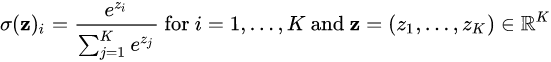


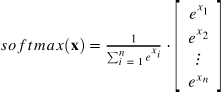

[0.02134556 0.14271419 0.02607153 0.0235905  0.05250162 0.17431151
 0.3879374  0.0288135  0.14271419]


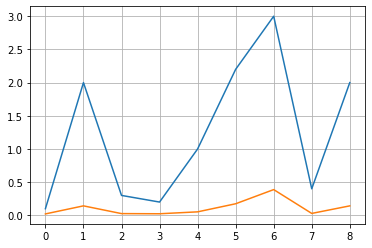

In [157]:
# MANUAL_SOFTMAX
def softmax(X):
    exp = np.exp(X)
    # print(np.sum(exp, axis=-1, keepdims=True))
    return exp / np.sum(exp, axis=-1, keepdims=True)

logits = [0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
print(softmax(logits))

plt.grid(True)
plt.plot(range(0, len(logits)),
    logits)

plt.plot(range(0, len(logits)),
    sess.run(t))

[0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
[0.02134556 0.1427142  0.02607153 0.0235905  0.05250162 0.17431152
 0.3879374  0.0288135  0.1427142 ]
sum of softmax components - 1.0


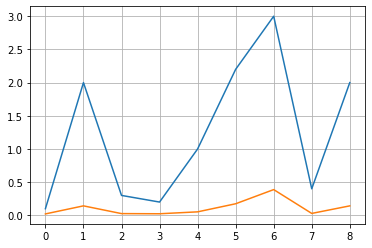

In [158]:
# TENSORFLOW_SOFTMAX

import tensorflow as tf

sess = tf.compat.v1.Session()

logits = [0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
t = tf.nn.softmax(logits, axis=None, name=None)
print(logits)
print(sess.run(t))
print("sum of softmax components - %s"%(np.sum(sess.run(t))))

import matplotlib.pyplot as plt

plt.grid(True)
plt.plot(range(0, len(logits)),
    logits)

plt.plot(range(0, len(logits)),
    sess.run(t))

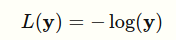    
Negative Log-Likelihood (NLL)    
Loss Function   
log-likelyhood is usually used for a set of values (for continuous median square error is preffered)   
http://wiki.fast.ai/index.php/Log_Loss

$$L(y) = - \log(y)$$

Logarithmic loss (related to cross-entropy) measures the performance of a classification model where the prediction input is a probability value between 0 and 1   
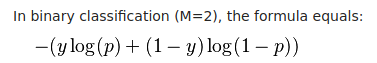

$$-(y \log p + (1 - y)\log(1 - p))$$

(array([ 32.,  96., 268., 228., 104.,  81.,  54.,  26.,  30.,  20.,  13.,
         13.,  12.,   9.,   7.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.10187951, 0.31009386, 0.51830821, 0.72652256, 0.93473691,
        1.14295126, 1.35116561, 1.55937996, 1.76759431, 1.97580866,
        2.18402301, 2.39223736, 2.60045171, 2.80866606, 3.01688041,
        3.22509476, 3.43330911, 3.64152346, 3.84973781, 4.05795216,
        4.26616651, 4.47438086, 4.68259521, 4.89080956, 5.09902391,
        5.30723826, 5.51545261, 5.72366696, 5.93188131, 6.14009566,
        6.34831001]),
 <a list of 30 Patch objects>)

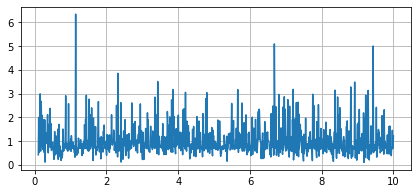

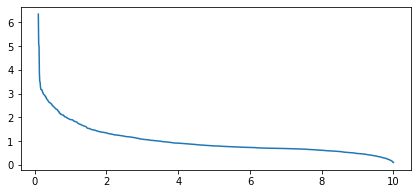

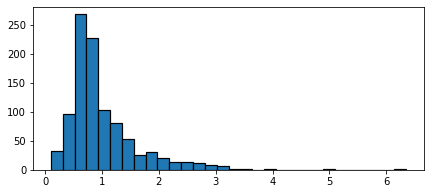

In [154]:
def negative_log_likelihood(p_true_val, p_predict_val):
    # tf.log() - log with base "e"
    return -(p_true_val * np.log(p_predict_val) + (1.0 - p_true_val) * np.log(1 - p_predict_val))

def loss(p_true_val, p_predict_val):
    return negative_log_likelihood(p_true_val, p_predict_val)

samples_num_int = 1000
x_lst = np.linspace(0.1, 10, samples_num_int)
    

loss_lst = loss(np.random.random(1000), np.random.random(1000))

plt.figure(figsize=(7, 3))
plt.grid(True)
plt.plot(x_lst, loss_lst)

plt.figure(figsize=(7, 3))
plt.plot(x_lst, np.flip(np.sort(loss_lst)))

plt.figure(figsize=(7, 3))
plt.hist(loss_lst, edgecolor='black', linewidth=1.2, bins=30)

In [160]:
class Model():
    def __init__(self,
        p_input_size,
        p_output_size,
        p_W,
        p_b):
        self.input_size = p_input_size
        self.output_size = p_output_size
        self.W           = p_W
        self.b           = p_b
        
#-------------------------------------------------------------
# INIT
def mod__init(p_input_size, p_output_size):
    W = np.random.uniform(size = (p_input_size, p_output_size),
       high = 0.1,
       low  = -0.1)
    
    b = np.random.uniform(size = p_output_size,
        high = 0.1,
        low  = -0.1)
    
    model = Model(p_input_size,
        p_output_size,
        W,
        b)
    return model
        
#-------------------------------------------------------------
# FORWARD_PASS
def mod__forward_pass(X, p_model):
    Z = np.dot(X, p_model.W) + p_model.b
    return softmax(Z)

#-------------------------------------------------------------
# PREDICT
def mod__predict(X, p_model):
    if len(X.shape) == 1:
        return np.argmax(mod__forward_pass(X, p_model))
    else:
        return np.argmax(mod__forward_pass(X, p_model), axis=1)

#-------------------------------------------------------------
def mod__grad_loss(x, y_true, p_model):
    y_pred        = mod__forward_pass(x, p_model)
    y_true_onehot = one_hot(p_model.output_size, y_true)
    
    dnll_output = y_pred - y_true_onehot
    grad_W      = np.outer(x, dnll_output)
    grad_b      = dnll_output
    grads       = {"W": grad_W, "b": grad_b}
    return grads

#-------------------------------------------------------------
# TRAIN
def mod__train(x, y, p_learning_rate, p_model):
    # Traditional SGD update without momentum
    grads     = mod__grad_loss(x, y, p_model)
    p_model.W = p_model.W - p_learning_rate * grads["W"]
    p_model.b = p_model.b - p_learning_rate * grads["b"]      

#-------------------------------------------------------------
# LOSS
def mod__loss(X, y, p_model):
    true_val      = one_hot(p_model.output_size, y)
    predicted_val = mod__forward_pass(X, p_model)
    return loss(true_val, predicted_val)

#-------------------------------------------------------------
# ACCURACY
def mod__accuracy(X, y, p_model):
    y_preds = np.argmax(mod__forward_pass(X, p_model), axis=1)
    return np.mean(y_preds == y)


In [161]:
# number of features per example
n_features = X_train.shape[1]
n_classes  = len(np.unique(y_train))

print("n_features - %s"%(n_features))
print("n_classes  - %s"%(n_classes))

model = mod__init(n_features, n_classes)

print("Evaluation of the untrained model:")
train_loss = mod__loss(X_train, y_train, model)
train_acc  = mod__accuracy(X_train, y_train, model)
test_acc   = mod__accuracy(X_test, y_test, model)

# print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
#       % (train_loss, train_acc, test_acc))

n_features - 64
n_classes  - 10
Evaluation of the untrained model:
